In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import datasets
delay = pd.read_csv('data/all_years.csv', delimiter='\t')
codes_srt = pd.read_csv('data/codes_srt.csv', delimiter='\t')
codes_sub = pd.read_csv('data/codes_sub.csv', delimiter='\t')
station_names = pd.read_csv('data/station_names.csv')
codes_bins = pd.read_csv('data/codes_bins.csv')

# Merge Datasets
delay = pd.merge(left=delay, right=codes_srt, how='left', left_on=delay['Code'], 
        right_on=codes_srt['SRT RMENU CODE']).drop(columns='key_0',axis=1)

delay = pd.merge(left=delay, right=codes_sub, how='left', 
                left_on=delay['Code'], right_on=codes_sub['SUB RMENU CODE']).drop(columns='key_0', axis=1)

delay = pd.merge(left=delay, right=station_names, how='left',
                left_on=delay['Station'], right_on=station_names['data_station']).drop(columns=['Unnamed: 0','key_0','data_station'],axis=1)

# Create Combo Code Column
delay['combo code'] = delay['CODE DESCRIPTION_y'].fillna(delay['CODE DESCRIPTION_y'])

delay = pd.merge(left=delay, right=codes_bins, how='left', left_on=delay['combo code'], 
                right_on=codes_bins['combo code']).drop(columns=['key_0','combo code_x'], axis=1)
delay = delay.rename(columns={'combo code_y': 'combo code'})

In [9]:
pd.merge(left=delay, right=codes_srt, how='left', left_on=delay['Code'], 
        right_on=codes_srt['SRT RMENU CODE']).drop(columns='key_0',axis=1)



,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,CODE DESCRIPTION_x,SUB RMENU CODE,CODE DESCRIPTION_y,real_station,location,real_line,combo code,code bin,SRT RMENU CODE_y,CODE DESCRIPTION
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,...,NaN,MUPR1,Priority One - Train in Contact With Person,victoria park,Station,BD,Priority One - Train in Contact With Person,Accident,NaN,NaN
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,...,NaN,SUDP,Disorderly Patron,high park,Station,BD,Disorderly Patron,Disorderly Patron,NaN,NaN
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,...,NaN,NaN,NaN,sheppard,Station,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,...,NaN,SUDP,Disorderly Patron,lansdowne,Station,BD,Disorderly Patron,Disorderly Patron,NaN,NaN
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,...,NaN,MUSAN,Unsanitary Vehicle,bloor,Station,NaN,Unsanitary Vehicle,Unsantiary Vehicle,NaN,NaN
5,2014-01-01,03:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174,...,NaN,MUPAA,Passenger Assistance Alarm Activated - No Trou...,dufferin,Station,BD,Passenger Assistance Alarm Activated - No Trou...,Alarm - No Trouble Found,NaN,NaN
6,2014-01-01,07:31,Wednesday,NORTH YORK CTR STATION,MUNCA,0,0,NaN,YU,0,...,NaN,NaN,NaN,north york centre,Station,YU,NaN,NaN,NaN,NaN
7,2014-01-01,07:32,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,...,NaN,NaN,NaN,sheppard,Station,NaN,NaN,NaN,NaN,NaN
8,2014-01-01,07:34,Wednesday,QUEEN STATION,MUNCA,0,0,NaN,YU,0,...,NaN,NaN,NaN,queen,Station,YU,NaN,NaN,NaN,NaN
9,2014-01-01,07:34,Wednesday,RUNNYMEDE STATION,MUNCA,0,0,NaN,BD,0,...,NaN,NaN,NaN,runnymede,Station,BD,NaN,NaN,NaN,NaN


In [3]:
# Filter Dataset
delay = delay.drop(columns=['SRT RMENU CODE','CODE DESCRIPTION_x','SUB RMENU CODE', 
                   'CODE DESCRIPTION_y'])

In [4]:
# What does our data look like
delay.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,real_station,location,real_line,combo code,code bin
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,victoria park,Station,BD,Priority One - Train in Contact With Person,Accident
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,high park,Station,BD,Disorderly Patron,Disorderly Patron
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,sheppard,Station,NaN,NaN,NaN
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,lansdowne,Station,BD,Disorderly Patron,Disorderly Patron
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,bloor,Station,NaN,Unsanitary Vehicle,Unsantiary Vehicle


## Missing Values

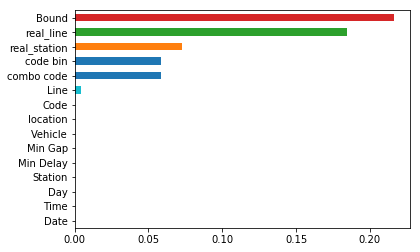

In [5]:
delay.isnull().mean().sort_values().plot(kind='barh')

### Bound
- Directional in one direction, nulls can be expected as some delays are when subways are not in transit
- Complete Nulls with 'NA'

### real_station
- some "Station" in original datasets are not real subway stations, therefore we can fill Nulls with 'Misc'

### combo code
- some delays are not reported with a reason
- we cant complete this data
- fill in all Nulls with 'misc'

In [10]:
# Complete Missing Values if possible
delay['Bound'] = delay['Bound'].fillna('NA')
delay['real_station'] = delay['real_station'].fillna('Misc')
delay['combo code'] = delay['combo code'].fillna('Misc')

## Data Cleaning

In [7]:
# What are the Data Types are we working with?
delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97677 entries, 0 to 97676
Data columns (total 15 columns):
Date            97677 non-null object
Time            97677 non-null object
Day             97677 non-null object
Station         97677 non-null object
Code            97676 non-null object
Min Delay       97677 non-null int64
Min Gap         97677 non-null int64
Bound           97677 non-null object
Line            97277 non-null object
Vehicle         97677 non-null int64
real_station    97677 non-null object
location        97677 non-null object
real_line       79688 non-null object
combo code      97677 non-null object
code bin        91956 non-null object
dtypes: int64(3), object(12)
memory usage: 11.9+ MB


In [11]:
# Convert data to Datetime
delay['Date'] = pd.to_datetime(delay['Date'])

# Generate Month/Year Variables
delay['Month'] = [i.month for i in delay['Date']]
delay['Year'] = [i.year for i in delay['Date']]

In [12]:
# Get Hours columns for Min Delay/Gap
delay['Min Delay Hours'] = delay['Min Delay']/60
delay['Min Gap Hours'] = delay['Min Gap']/60

In [13]:
delay

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,CODE DESCRIPTION_y,real_station,location,real_line,combo code,code bin,Month,Year,Min Delay Hours,Min Gap Hours
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,...,Priority One - Train in Contact With Person,victoria park,Station,BD,Priority One - Train in Contact With Person,Accident,1,2014,0.916667,1.000000
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,...,Disorderly Patron,high park,Station,BD,Disorderly Patron,Disorderly Patron,1,2014,0.050000,0.116667
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NA,YU,0,...,NaN,sheppard,Station,NaN,Misc,NaN,1,2014,0.000000,0.000000
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,...,Disorderly Patron,lansdowne,Station,BD,Disorderly Patron,Disorderly Patron,1,2014,0.050000,0.133333
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,...,Unsanitary Vehicle,bloor,Station,NaN,Unsanitary Vehicle,Unsantiary Vehicle,1,2014,0.083333,0.166667
5,2014-01-01,03:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174,...,Passenger Assistance Alarm Activated - No Trou...,dufferin,Station,BD,Passenger Assistance Alarm Activated - No Trou...,Alarm - No Trouble Found,1,2014,0.000000,0.000000
6,2014-01-01,07:31,Wednesday,NORTH YORK CTR STATION,MUNCA,0,0,NA,YU,0,...,NaN,north york centre,Station,YU,Misc,NaN,1,2014,0.000000,0.000000
7,2014-01-01,07:32,Wednesday,SHEPPARD STATION,MUNCA,0,0,NA,YU,0,...,NaN,sheppard,Station,NaN,Misc,NaN,1,2014,0.000000,0.000000
8,2014-01-01,07:34,Wednesday,QUEEN STATION,MUNCA,0,0,NA,YU,0,...,NaN,queen,Station,YU,Misc,NaN,1,2014,0.000000,0.000000
9,2014-01-01,07:34,Wednesday,RUNNYMEDE STATION,MUNCA,0,0,NA,BD,0,...,NaN,runnymede,Station,BD,Misc,NaN,1,2014,0.000000,0.000000


## Data Exploration

### 1. What are the common types of Min/Delay or Gaps by Code Bins

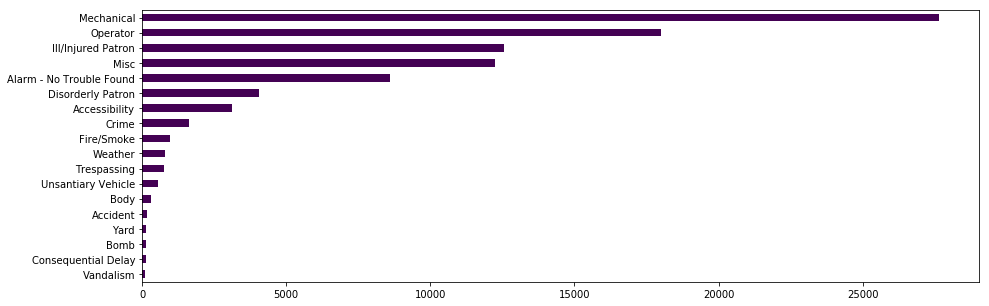

In [10]:
# What are the most commonly occuring delays
delay['code bin'].value_counts().sort_values().plot(kind='barh',figsize=(15,5),
                                     colormap='viridis')

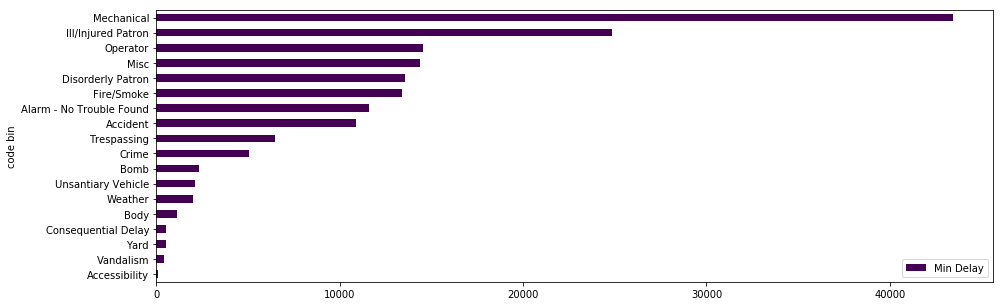

In [11]:
# What are the most common types of Delays
delay[['code bin','Min Delay']].groupby( 
       'code bin').sum().sort_values('Min Delay', ascending=True).plot(
       kind='barh',figsize=(15,5), colormap='viridis')

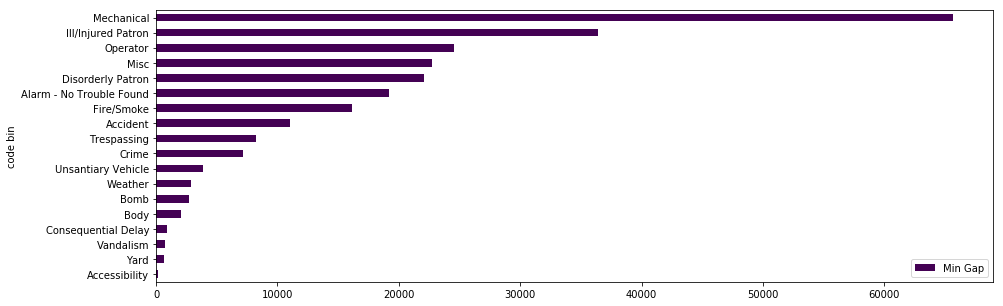

In [12]:
# What are the most common types of Delays by Min Gap between trains
delay[['code bin','Min Gap']].groupby('code bin').sum().sort_values(
    'Min Gap', ascending=True).plot(kind='barh',
                                    figsize=(15,5), colormap='viridis')

### 2. Delay Trends: Are certain types of Delays now more common?

In [13]:
# Get trends Dataframe
trends = delay[['Year','code bin','Min Delay']].groupby(['Year','code bin']).count()
trends = trends.sort_values(['code bin','Year']).unstack().pct_change(4).dropna()
trends.columns = trends.columns.droplevel()
trends.columns = trends.columns.tolist()
trends = pd.melt(trends, id_vars=['Year'],value_vars=trends.columns.tolist()).drop(columns='Year')

C:\Users\kyleb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


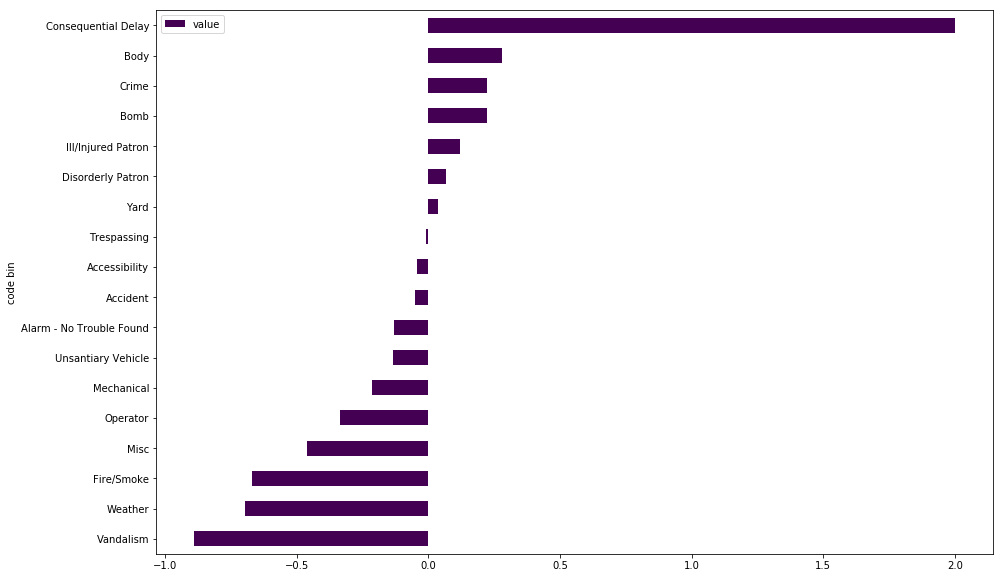

In [14]:
# Plot Delay Trends
trends = trends.rename(columns={'variable': 'code bin'})
trends.index = trends['code bin']
trends = trends.drop(columns='code bin',axis=1)
trends.sort_values('value',ascending=True).plot(kind='barh',figsize=(15,10), colormap='viridis')

### 3. Efficiency Trends: Is the time spent per delay getting smaller?

In [142]:
# Get Efficieny Dataframe
hours = delay[['Year','code bin','Min Delay Hours']].groupby(['Year','code bin']).sum()
counts = delay[['Year','code bin','Min Delay Hours']].groupby(['Year','code bin']).count()
efficiency = hours/counts

# Get Growth Rates of Efficiency Metrics
efficiency = efficiency.sort_values(['code bin','Year']).unstack().pct_change(4).dropna()
efficiency.columns = efficiency.columns.droplevel()
efficiency = pd.melt(efficiency, id_vars=['Year'],value_vars=efficiency.columns.tolist()).drop(columns='Year',axis=1)

# Reset efficiency Index
efficiency.index = efficiency['code bin']
efficiency = efficiency.drop(columns='code bin',axis=1)

C:\Users\kyleb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


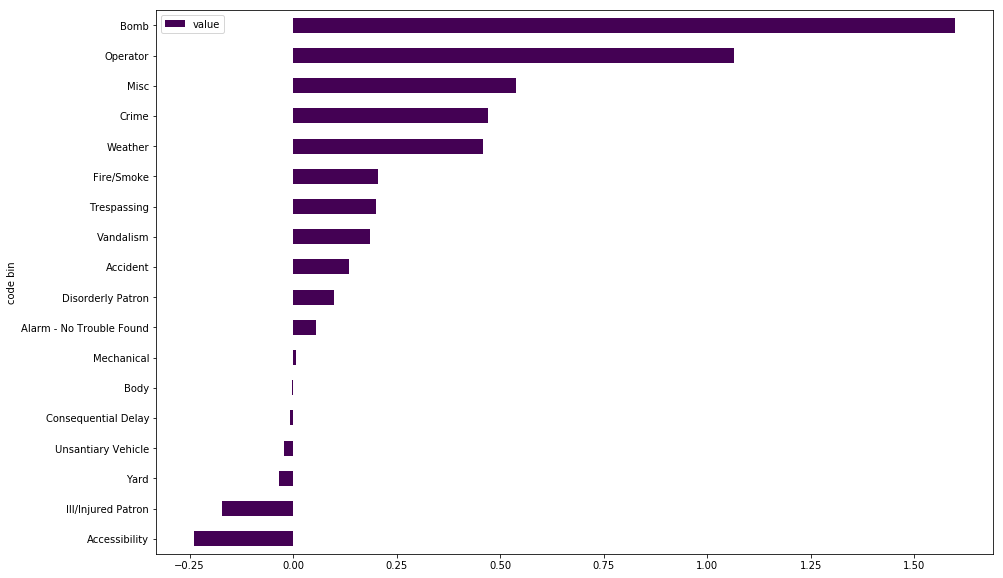

In [88]:
# Plot efficiency metrics
efficiency.sort_values('value').plot(kind='barh',figsize=(15,10),colormap='viridis')

### 4. Delay Trends by Line: Are More Delays occuring on different lines?

In [145]:
# Create Function to Identify Trends by Line

colList = ['Year','real_line','Min Delay Hours']

def getLineDetails(df, colList, agg, codeFilter=None):
    
    new_df = df.dropna(subset=['real_line'])
    
    new_df.head()
    
    if codeFilter == None:
        new_df = new_df[colList]
    else:
        new_df = new_df[new_df['code bin']==codeFilter][colList]
    
    if agg == 'sum':
        return new_df.groupby(colList[:-1]).sum().unstack()
    elif agg == 'mean':
        return new_df.groupby(colList[:-1]).mean().unstack()
    elif agg == 'count':
        return new_df.groupby(colList[:-1]).count().unstack()
    elif agg == 'eff':
        return new_df.groupby(colList[:-1]).mean().unstack().pct_change()

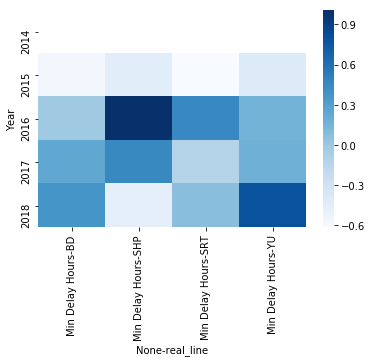

In [148]:
# Minimum Delay Hours
colList = ['Year','real_line','Min Delay Hours']
sns.heatmap(getLineDetails(delay, colList, 'eff', 'Mechanical'), cmap='Blues')

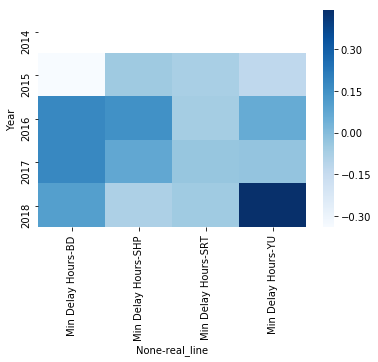

In [127]:

    
sns.heatmap(getLineDetails(delay, colList, 'eff'), cmap='Blues')
#sns.heatmap(getLineDetails(delay, colList, 'mean'))
#sns.heatmap(getLineDetails(delay, colList, 'count'))

Min Delay Hours                              
real_line              BD       SHP       SRT        YU
Year                                                   
2014             0.035233  0.045125  0.063694  0.032897
2015             0.023234  0.042882  0.058983  0.028645
2016             0.027377  0.049358  0.055201  0.030403
2017             0.032238  0.053000  0.053331  0.029603
2018             0.035591  0.048631  0.050558  0.042676

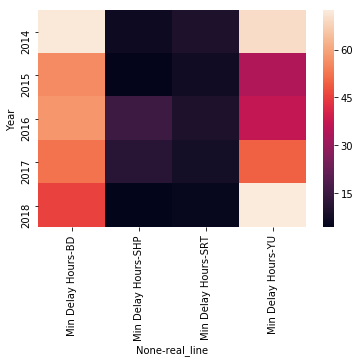

In [40]:
sns.heatmap(data=lines)

In [44]:
# Is this change in delay across the YU/BD lines due to an increase in delay alarms, or a decrease in efficiency?
lines_count = delay.dropna(subset=['real_line'])
lines_count = lines_count[lines_count['code bin']=='Mechanical'][['Year','real_line','Min Delay Hours']]
lines_count = lines_count.groupby(['Year','real_line']).count().unstack()

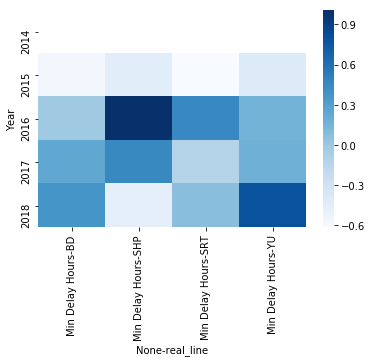

In [55]:
linesEfficiency = lines/lines_count
sns.heatmap(data=linesEfficiency.pct_change(1), cmap='Blues')
#sns.heatmap(data=linesEfficiency)

In [73]:
# How does this compare to the Min Gap between trains
lines_gap = delay.dropna(subset=['real_line'])
lines_gap = lines_gap[lines_gap['code bin']=='Mechanical'][['Year','real_line','Min Gap Hours']]
lines_gap_time = lines_gap.groupby(['Year','real_line']).sum().unstack()
lines_gap_count = lines_gap.groupby(['Year','real_line']).count().unstack()

In [74]:
gap_efficiency = lines_gap_time/lines_gap_count
gap_efficiency.pct_change()

Min Gap Hours                              
real_line            BD       SHP       SRT        YU
Year                                                 
2014                NaN       NaN       NaN       NaN
2015          -0.571540 -0.054471 -0.614975 -0.384905
2016          -0.050272  0.974361  0.365567  0.083679
2017           0.294219  0.232156 -0.139693  0.226741
2018           0.353474 -0.367094  0.191286  0.684085

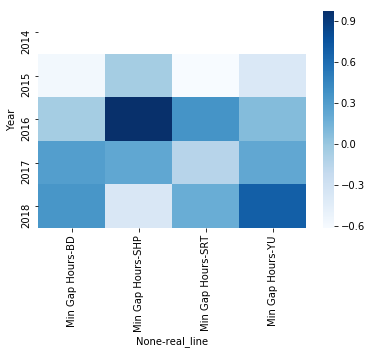

In [75]:
sns.heatmap(data=gap_efficiency.pct_change(), cmap='Blues')

In [76]:
gap_efficiency.pct_change()

Min Gap Hours                              
real_line            BD       SHP       SRT        YU
Year                                                 
2014                NaN       NaN       NaN       NaN
2015          -0.571540 -0.054471 -0.614975 -0.384905
2016          -0.050272  0.974361  0.365567  0.083679
2017           0.294219  0.232156 -0.139693  0.226741
2018           0.353474 -0.367094  0.191286  0.684085

In [80]:
# How are Delays and Min Gap Correlated
delay[['real_line','Min Delay Hours','Min Gap Hours']].groupby('real_line').corr()

Min Delay Hours  Min Gap Hours
real_line                                                
BD        Min Delay Hours         1.000000       0.977567
          Min Gap Hours           0.977567       1.000000
SHP       Min Delay Hours         1.000000       0.877726
          Min Gap Hours           0.877726       1.000000
SRT       Min Delay Hours         1.000000       0.847305
          Min Gap Hours           0.847305       1.000000
YU        Min Delay Hours         1.000000       0.883721
          Min Gap Hours           0.883721       1.000000